# Algorithmic Data Science - Exercise Series 1

**Konstantinos Papadakis**

*Data Science and Machine Learning 03400149*

*k.i.papadakis@gmail.com*

## Exercise 1

<img src="./images/exercise1.png" width="600">

<!-- ![ex1](images/exercise1.png) -->

### 6.3.1

<img src="images/6-3-1.png" width="600">

In [1]:
import itertools
import collections
from pprint import pprint

import numpy as np

baskets = np.array([
    [1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6],
    [1, 3, 5], [2, 4, 6], [1, 3, 4], [2, 4, 5],
    [3, 5, 6], [1, 2, 4], [2, 3, 5], [3, 4, 6],
], dtype=int)
threshold = 4
n_buckets = 11

def hash_(i, j):
    return (i * j) % n_buckets


# (a) Compute the supports 
item_names, item_freqs = np.unique(baskets, return_counts=True)

pair_freqs = np.zeros((6, 6), dtype=int)
for basket in baskets:
    for x in basket:
        for y in basket:
            pair_freqs[x-1][y-1] += 1  # 0 based indexing, should be a triangular matrix normally

print('Singleton Counts')
for name, count in zip(item_names, item_freqs):
    print(f'{name}: {count}')
print()
print('Pair Counts')
print(pair_freqs)
print()

# (b) Hashes
print('Hashes')
for pair in itertools.combinations(item_names, 2):
    print(f'{pair}: {hash_(*pair)}')
print()

# (c) Frequent bucket
bucket_freqs = np.zeros(n_buckets, dtype=int)
for basket in baskets:
    for pair in itertools.combinations(basket, 2):
        bucket_freqs[hash_(*pair)] += 1

print('Frequent Buckets')
print(*(bucket for bucket, freq in enumerate(bucket_freqs) if freq >= threshold))
print()

# (d) PCY second pass pairs
pcy_freq_pairs = []
for pair in itertools.combinations(item_names, 2):
    if bucket_freqs[hash_(*pair)] >= threshold:
        pcy_freq_pairs.append(pair)
print('PCY Second Pass Pairs')
print(*(pcy_freq_pairs))

Singleton Counts
1: 4
2: 6
3: 8
4: 8
5: 6
6: 4

Pair Counts
[[4 2 3 2 1 0]
 [2 6 3 4 2 1]
 [3 3 8 4 4 2]
 [2 4 4 8 3 3]
 [1 2 4 3 6 2]
 [0 1 2 3 2 4]]

Hashes
(1, 2): 2
(1, 3): 3
(1, 4): 4
(1, 5): 5
(1, 6): 6
(2, 3): 6
(2, 4): 8
(2, 5): 10
(2, 6): 1
(3, 4): 1
(3, 5): 4
(3, 6): 7
(4, 5): 9
(4, 6): 2
(5, 6): 8

Frequent Buckets
1 2 4 8

PCY Second Pass Pairs
(1, 2) (1, 4) (2, 4) (2, 6) (3, 4) (3, 5) (4, 6) (5, 6)


### 6.3.2

<img src="images/6-3-2.png" width="700">

In [2]:
def hash_2(i, j):
    return (i * j) % n_buckets

n_buckets_2 = 9
bucket_freqs_2 = np.zeros(n_buckets_2, int)
first_pass_candidates = set(pcy_freq_pairs)  # should be a bitmap normally

# Stage 2
for basket in baskets:
    for pair in itertools.combinations(basket, 2):
        if pair in first_pass_candidates:
            bucket_freqs_2[hash_2(*pair)] += 1

stage_2_pairs = []
for pair in pcy_freq_pairs:
    if bucket_freqs_2[hash_2(*pair)] >= threshold:
        stage_2_pairs.append(pair)
        
print('Second Pass Bucket Frequencies')
print(bucket_freqs_2)
print()
print('Frequent Pairs after the Second Pass')
print(*stage_2_pairs)

Second Pass Bucket Frequencies
[0 5 5 0 6 0 0 0 6]

Frequent Pairs after the Second Pass
(1, 2) (1, 4) (2, 4) (2, 6) (3, 4) (3, 5) (4, 6) (5, 6)


The second hashing didn't reduce the frequent pairs, which is quite unfortunate.

### 6.4.1

<img src="images/6-4-1.png" width=700>

First of all, since the maximal frequent itemsets all have cardinality $\leq 2$, any itemset of cardinality $>3$ can't be in the border, since we can remove one element and the result will still be infrequent.

Also, the frequent singletons are $\{A\}, \{B\}, \{C\}, \{D\}, \{E\}$, and together with $\{A, B\}, \{B, C\}, \{A, C\}, \{A, D\}$ they make all the frequent itemsets.

The singletons which are not frequent are in the border.

$E$ along with any of the $A, B, C, D$ is in the border.

And finally, from the union of pairs from $\{A, B\}, \{B, C\}, \{A, C\}, \{A, D\}$, only $\{A, B, C\}$ is in the border.

**To summarize,** the border is:
$\{F\}, \{G\}, \{H\}, \{A, E\}, \{B, E\}, \{C, E\}, \{D, E\}, \{A, B, C\}$.


## Exercise 2

<img src="images/exercise2.png" width=700>

### (a) Correctness of the A-Priori Algorithm

In the A-Priori algorithm, 

* At first we count the frequencies of all singletons and drop any that are not frequent.

* Using the result of the filtering, we construct all pairs, count their frequencies again, and drop the pairs that are not frequent.

* Continuing in this manner, given the frequent itemsets of cardinality k, we construct itemsets of cardinality k+1.

The algorithm produces correct results because all subsets of a frequent itemset are themselves frequent, meaning that we can construct any frequent itemset from its frequent subsets (the frequent itemsets of one size smaller are enough to achieve this).

The A-Priori algorithm requires one pass everytime we increase the itemset cardinality, so that it can count the frequencies.

### (b) Complexity of the A-Priori Algorithm

Consider the extreme case where the threshold is set to 0, meaning that all itemsets are considered frequent. In that case, we are building all subsets of cardinality $K$ of a set of cardinality $N$, therefore the complexity is of the order $\binom{N}{K}$ which is not polynomial neither in $N$ nor in $K$.


### (c) (i) Correctness of the FP-Growth Algorithm

The FP-Growth algorithm attempts to efficiently store the dataset in a Trie data structure. The items of each basket are inserted in the trie in decreasing order of their frequency, so that the chance of creating redundant paths in the Trie becomes smaller. Each node in the Trie also contains a pointer to the next node that contains the same key/item ("next" by order of insertion). Each node contains a value the number of times a path crossed it during insertion. A pointer to the first node for each item is stored, so that all Trie nodes containing that item value can be traversed as a Linked List. In a adition to that, each node contains a pointer to each parent so that we can traverse the trie from the bottom up.

Using this Trie, the FP-Growth can generate all paths that end in a specific item. This is done by first accessing all nodes that contain that item (by traversing the linked list). Then we go up to their parents and propagate the value of the node, and more than two paths contribute to parent, then we add the values. We continue going up until we reach the root of the tree, pruning nodes when their value becomes infrequent.

Now the result is paths from the root to nodes with the with the suffix item of interest. For each path we collect all subsets and the keep the minimum value of that subset. If the same subset was encountered in more than one paths, we add the values. This way we now have all frequent subsets that end in that item with their frequency being the node's value.  

### (c) (ii) Complexity of the FP-Growth Algorithm

In the extreme case where the resulting Trie is a full tree, then the algorithm will have to solve an exponentially large number of subproblem and then merge their result. Therefore it is exponential with respect to the input. If the output of the FP-Growth Algorithm is all frequent itemsets, then again due to a possible "bad" tree structure, the complexity can be exponential.

### (d) A-Priori and FP-Growth Examples

In [3]:
# Calculating the correct results 
baskets = [
    ['a', 'c', 'd'],
    ['a', 'd'],
    ['b', 'c', 'd'],
    ['b', 'd'],
    ['a', 'c'],
    ['a', 'b', 'c', 'd'],
    ['a', 'c'],
    ['a', 'd'],
    ['b', 'd'],
    ['a', 'b', 'd'],
    ['c', 'd'],
    ['b', 'c'],
]

freqs = collections.Counter(itertools.chain.from_iterable(baskets))
for basket in baskets:
    # Sort each basket by descending frequency for FP-Growth
    basket.sort(key=freqs.get, reverse=True)
    
pair_freqs = collections.Counter()
for basket in baskets:
    pair_freqs.update(itertools.combinations(basket, 2))
pair_freqs
    
print(f'Singleton Frequencies: {freqs.most_common()}')
print()
print('Baskets:') 
pprint(baskets)
print()
print('Pair Frequencies:')
pprint(pair_freqs.most_common())

Singleton Frequencies: [('d', 9), ('a', 7), ('c', 7), ('b', 6)]

Baskets:
[['d', 'a', 'c'],
 ['d', 'a'],
 ['d', 'c', 'b'],
 ['d', 'b'],
 ['a', 'c'],
 ['d', 'a', 'c', 'b'],
 ['a', 'c'],
 ['d', 'a'],
 ['d', 'b'],
 ['d', 'a', 'b'],
 ['d', 'c'],
 ['c', 'b']]

Pair Frequencies:
[(('d', 'a'), 5),
 (('d', 'b'), 5),
 (('d', 'c'), 4),
 (('a', 'c'), 4),
 (('c', 'b'), 3),
 (('a', 'b'), 2)]


#### A-Priori Example

As we see above, the every singleton is frequent.
Therefore we construct all possible pairs and count their frequencies.
We then observe that only `('d', 'a'), ('d', 'b'), ('d', 'c'), ('a', 'c')` are frequent.
Next, using only letters from the above pairs we construct triples and observe that none of it is frequent, and thus the algorithm stops.

#### FP-Growth Example

<img src='images/fp-growth_1.jpg' width=300>
<br>
<img src='images/fp-growth_2.jpg' width=300>

### (e) Toivonen example

In [4]:
def get_freqs(baskets, k):
    freqs = collections.Counter()
    for basket in baskets:
        freqs.update(itertools.combinations(basket, k))
    return freqs.most_common()


sample = baskets[:3]
print('Sample:')
pprint(sample)
print()
print('Frequencies:')
for k in range(1, 4):
    pprint(get_freqs(sample, k))
print()
print('All pairs and triples')
pprint(list(itertools.combinations('dacb', 2)))
pprint(list(itertools.combinations('dacb', 3)))

Sample:
[['d', 'a', 'c'], ['d', 'a'], ['d', 'c', 'b']]

Frequencies:
[(('d',), 3), (('a',), 2), (('c',), 2), (('b',), 1)]
[(('d', 'a'), 2),
 (('d', 'c'), 2),
 (('a', 'c'), 1),
 (('d', 'b'), 1),
 (('c', 'b'), 1)]
[(('d', 'a', 'c'), 1), (('d', 'c', 'b'), 1)]

All pairs and triples
[('d', 'a'), ('d', 'c'), ('d', 'b'), ('a', 'c'), ('a', 'b'), ('c', 'b')]
[('d', 'a', 'c'), ('d', 'a', 'b'), ('d', 'c', 'b'), ('a', 'c', 'b')]


#### Case: threshold = 1
Border: $\{A, B\}$

The sample border point has frequency 2 > threshold = 1, so the algorithm fails.

In [5]:
def toivonen(threshold, border):
    itemsets = {}
    for k in range(1, 4):
        for t, freq in get_freqs(sample, k):
            if freq >= threshold:
                itemsets[frozenset(t)] = 0

    for basket in map(set, baskets):
        for counter in itemsets, border:
            for itemset in counter:
                if itemset <= basket:
                    counter[itemset] += 1

    print('Freqs')
    pprint(itemsets)
    print()
    print('Border Freqs:')
    pprint(border)


threshold = 1
border = {frozenset(['a', 'b']): 0}
toivonen(threshold, border)

Freqs
{frozenset({'d'}): 9,
 frozenset({'a'}): 7,
 frozenset({'c'}): 7,
 frozenset({'b'}): 6,
 frozenset({'a', 'd'}): 5,
 frozenset({'d', 'c'}): 4,
 frozenset({'a', 'c'}): 4,
 frozenset({'b', 'd'}): 5,
 frozenset({'b', 'c'}): 3,
 frozenset({'a', 'd', 'c'}): 2,
 frozenset({'b', 'd', 'c'}): 2}

Border Freqs:
{frozenset({'a', 'b'}): 2}


#### Case: threshold = 2

Border: $\{B\}, \{D, A, C\}$

The sample border point $\{B\}$ has frequency 6 > threshold = 2, so the algorithm fails.

In [6]:
threshold = 2
border = {frozenset(['b']): 0, frozenset(['d', 'a', 'c']): 0}
toivonen(threshold, border)

Freqs
{frozenset({'d'}): 9,
 frozenset({'a'}): 7,
 frozenset({'c'}): 7,
 frozenset({'a', 'd'}): 5,
 frozenset({'d', 'c'}): 4}

Border Freqs:
{frozenset({'b'}): 6, frozenset({'a', 'd', 'c'}): 2}


## Exercise 3

<img src="images/exercise3.png" width="700">

The algorithm that is going to be tested is **A fast APRIORI implementation** (fimi01). I tried to run all other algorithms in the website using Ubuntu OS, but I was either receiving various compilation errors, or segmentation errors, or the algorithm was running indefinitely producing multiple gigabyte files even when the thresholds were set extremely high.

The datasets on which the algorithm is going to be tested are **kosarak**, **accidents** and **pumsb**.

I used a modified version of [this shell script](http://www.cs.bme.hu/~bodon/en/apriori/test_running_time) to measure the times needed by the algorithm to find all itemsets given thresholds 90%, 80%, 70%, and 60%. 

The folowing image displays the times required by the algorithm. More detailed output is contained in the files `time_results.txt` and `console_output.txt`.




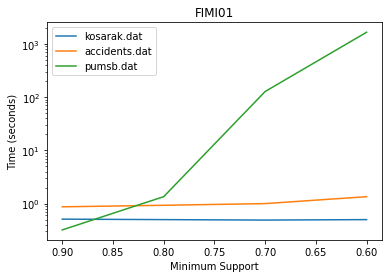

In [7]:
import re
import matplotlib.pyplot as plt


with open('fimi/time_results.txt') as f:
    text = f.read()

dbs = re.split(r'-+', text)

fig, ax = plt.subplots()

for db in dbs:
    match = re.search(r'(.*?) database', db)
    if match is None:
        continue
    name = match.group(1)
    supports, times = [], []
    for match in re.finditer(r'minsupp: (\d*\.?\d*)\n(\d*\.?\d*)', db):
        supports.append(float(match.group(1)))
        times.append(float(match.group(2)))
    ax.plot(supports, times, label=name)

ax.set_yscale('log')
ax.invert_xaxis()
ax.set_xlabel('Minimum Support')
ax.set_ylabel('Time (seconds)')
ax.set_title('FIMI01')
ax.legend()
plt.show()

## Exercise 4

<img src="images/exercise4.png" width="600">

### 5.2.2

<img src="images/5-2-2.png" width="600">

<img src="images/figure-5-4.png" width="300">

$$
\begin{pmatrix}
    0   & 1/2 & 0 & 0   & 0 \\
    1/3 & 0   & 0 & 1/2 & 0 \\
    1/3 & 0   & 0 & 1/2 & 0 \\
    1/3 & 1/2 & 0 & 0   & 0 \\
    0   & 0   & 1 & 0   & 0 \\
\end{pmatrix}
$$

<img src="images/figure-5-7.png" width="300">

$$
\begin{pmatrix}
1/3 & 1/2 & 0   \\
1/3 & 0   & 1/2 \\
1/3 & 1/2 & 1/2 \\
\end{pmatrix}
$$

### 5.2.3

<img src="images/5-2-3.png" width="600">

<img src="images/figure-5-3.png" width="300">

* $M_{11}: \{A, B\} \to \{A, B\}$

    <!-- | Source | Out-Degree | Destinations |
    | --- | --- | --- |
    | A | 3 | B |
    | B | 2 | A | -->

    <table>
        <tr>
            <th>Source</th>
            <th>Out-Degree</th>
            <th>Destinations</th>
        </tr>
        <tr>
            <td>A</td>
            <td>3</td>
            <td>B</td>
        </tr>
        <tr>
            <td>B</td>
            <td>2</td>
            <td>A</td>
        </tr>
    </table>

    <br>
    
* $M_{12}: \{A, B\} \to \{C, D\}$

    <!-- | Source | Out-Degree | Destinations |
    | --- | --- | --- |
    | A | 3 | C, D |
    | B | 2 | D | -->
    <table>
        <tr>
            <th>Source</th>
            <th>Out-Degree</th>
            <th>Destinations</th>
        </tr>
        <tr>
            <td>A</td>
            <td>3</td>
            <td>C, D</td>
        </tr>
        <tr>
            <td>B</td>
            <td>2</td>
            <td>D</td>
        </tr>
    </table>

    <br>

* $M_{21}: \{C, D\} \to \{A, B\}$

    <!-- | Source | Out-Degree | Destinations |
    | --- | --- | --- |
    | C | 0 |  |
    | D | 2 | B | -->
    <table>
        <tr>
            <th>Source</th>
            <th>Out-Degree</th>
            <th>Destinations</th>
        </tr>
        <tr>
            <td>C</td>
            <td>0</td>
            <td></td>
        </tr>
        <tr>
            <td>D</td>
            <td>2</td>
            <td>B</td>
        </tr>
    </table>

    <br>

* $M_{22}: \{C, D\} \to \{C, D\}$

    <!-- | Source | Out-Degree | Destinations |
    | --- | --- | --- |
    | C | 0 |  |
    | D | 2 | C | -->

    <table>
        <tr>
            <th>Source</th>
            <th>Out-Degree</th>
            <th>Destinations</th>
        </tr>
        <tr>
            <td>C</td>
            <td>0</td>
            <td></td>
        </tr>
        <tr>
            <td>D</td>
            <td>2</td>
            <td>C</td>
        </tr>
    </table>

### 5.3.1

<img src="images/5-3-1.png" width="600">

<img src="images/figure-5-15.png" width="300">

In [8]:
def pagerank(transmat, topic=None, tax=0.2, n_iter=50):
    
    if topic is None:
        # Simple pagerank
        topic = np.ones(np.shape(transmat)[0])
    
    # Normalize
    topic = topic / np.sum(topic) 
    transmat = transmat / np.sum(transmat, axis=0)
    
    # Uniform initial vector
    v = np.ones(np.shape(transmat)[0])
    v = v / np.sum(v)

    taxed_transmat = (1 - tax) * transmat
    teleport = tax * topic
    for _ in range(n_iter):
        v = taxed_transmat @ v + teleport
        
    return v


transmat = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 1, 0, 0],
])

topics = [
    np.array([1,0,0,0]),
    np.array([1,0,1,0]),
]

for topic in topics:
    ranks = pagerank(transmat, topic)
    print(f'Topic: {topic}\nPageranks: {ranks}\n')

Topic: [1 0 0 0]
Pageranks: [0.42857143 0.19047619 0.19047619 0.19047619]

Topic: [1 0 1 0]
Pageranks: [0.38571429 0.17142857 0.27142857 0.17142857]



### 5.4.2

<img src="images/5-4-2.png" width="600">

<img src="images/figure-5-1.png" width="300">

In [9]:
transmat = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 1, 0, 0],
])

trusted = np.array([0,1,0,0])

simple_ranks = pagerank(transmat, topic=None)
trusted_ranks = pagerank(transmat, topic=trusted)
spam_masses = (simple_ranks - trusted_ranks) / simple_ranks

print(f'Pageranks:   {simple_ranks}')
print(f'Trustranks:  {trusted_ranks}')
print(f'Spam Masses: {spam_masses}')

Pageranks:   [0.32142857 0.22619048 0.22619048 0.22619048]
Trustranks:  [0.26938776 0.35782313 0.15782313 0.21496599]
Spam Masses: [ 0.16190476 -0.58195489  0.30225564  0.04962406]


## Exercise 5

<img src="images/exercise5.png" width="600">

### 7.2.2

<img src="images/7-2-2.png" width="600">

<img src="images/figure-7-2.png" width="400">

In [10]:
class Node:
    
    def __init__(self, val=None, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        self.mapping = None
                
    def gather_leaves(self):
        leaves = []
        
        def dfs(node):
            if node is None:
                return
            if node.val is not None:
                leaves.append(node.val)
            dfs(node.left)
            dfs(node.right)
            
        dfs(self)
        return leaves

    def _display_aux(self, mapping=None):
        """Returns list of strings, width, height, and horizontal coordinate of the root."""
        # Credit for this method: https://stackoverflow.com/a/54074933/17386164
        val = self.val
        if val is None:
            val = '*'
        else:
            if mapping is not None:
                val = mapping[val]
        
        # No child.
        if self.right is None and self.left is None:
            line = '%s' % val
            width = len(line)
            height = 1
            middle = width // 2
            return [line], width, height, middle

        # Only left child.
        if self.right is None:
            lines, n, p, x = self.left._display_aux(mapping=mapping)
            s = '%s' % val
            u = len(s)
            first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s
            second_line = x * ' ' + '/' + (n - x - 1 + u) * ' '
            shifted_lines = [line + u * ' ' for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2

        # Only right child.
        if self.left is None:
            lines, n, p, x = self.right._display_aux(mapping=mapping)
            s = '%s' % val
            u = len(s)
            first_line = s + x * '_' + (n - x) * ' '
            second_line = (u + x) * ' ' + '\\' + (n - x - 1) * ' '
            shifted_lines = [u * ' ' + line for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2

        # Two children.
        left, n, p, x = self.left._display_aux(mapping=mapping)
        right, m, q, y = self.right._display_aux(mapping=mapping)
        s = '%s' % val
        u = len(s)
        first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s + y * '_' + (m - y) * ' '
        second_line = x * ' ' + '/' + (n - x - 1 + u + y) * ' ' + '\\' + (m - y - 1) * ' '
        if p < q:
            left += [n * ' '] * (q - p)
        elif q < p:
            right += [m * ' '] * (p - q)
        zipped_lines = zip(left, right)
        lines = [first_line, second_line] + [a + u * ' ' + b for a, b in zipped_lines]
        return lines, n + m + u, max(p, q) + 2, n + u // 2
    
    def display(self, mapping=None):
        # Credit for this method: https://stackoverflow.com/a/54074933/17386164
        lines, *_ = self._display_aux(mapping=mapping)
        for line in lines:
            print(line)


def l2_square(u, v):
    return np.sum((u - v)**2)
 

def min_distance(cluster1, cluster2):
    pairs = itertools.product(cluster1, cluster2)
    return min(itertools.starmap(l2_square, pairs))

 
def average_distance(cluster1, cluster2):
    pairs = itertools.product(cluster1, cluster2)
    return sum(itertools.starmap(l2_square, pairs)) / (len(cluster1) * len(cluster2))


def resulting_diameter(cluster1, cluster2):
    merged = itertools.chain(cluster1, cluster2)
    pairs = itertools.combinations(merged, 2)
    return max(itertools.starmap(l2_square, pairs))


def resulting_radius(cluster1, cluster2):
    merged = np.vstack([np.asarray(cluster1), np.asarray(cluster2)])
    center = np.mean(merged, axis=0)
    centered = merged - center
    dists = np.sum(centered**2, axis=1)
    return np.min(dists)


def hierarchical_clustering(data, distance_func):
    # Simple implementation. No heaps.
    
    n_samples = len(data)
    cluster_roots = [Node(val=idx) for idx in range(n_samples)]

    while len(cluster_roots) > 1:
        min_dist = float('+Infinity')
        min_dist_pair = None, None
        for i in range(len(cluster_roots) - 1):  # O(n^2)
            for j in range(i+1, len(cluster_roots)):
                a = cluster_roots[i].gather_leaves()  # O(n)
                b = cluster_roots[j].gather_leaves()
                d = distance_func(data[a], data[b])
                if d < min_dist:
                    min_dist = d
                    min_dist_pair = i, j
        
        left_idx, right_idx = min_dist_pair
        merged = Node(
            left=cluster_roots[left_idx],
            right=cluster_roots[right_idx]
        )
        # Order matters here
        del cluster_roots[right_idx]  # O(n)
        del cluster_roots[left_idx]  
        cluster_roots.append(merged)
    
    return cluster_roots[0]


data = np.array([
    [4, 10],
    [7, 10],
    [4, 8],
    [6, 8],
    [3, 4],
    [10, 5],
    [12, 6],
    [2, 2],
    [5, 2],
    [9, 3],
    [11, 4],
    [12, 3],
])


In [11]:
print('MINIMUM DISTANCE')
md = hierarchical_clustering(data, min_distance)
md.display(mapping=data)

print('\n\n')

print('AVERAGE DISTANCE')
ad = hierarchical_clustering(data, average_distance)
ad.display(mapping=data)

MINIMUM DISTANCE
      _______________________________*___________________________                  
     /                                                           \                 
   __*_______                                 ___________________*_____            
  /          \                               /                         \           
[9 3]     ___*_______                     ___*_____                  __*_____      
         /           \                   /         \                /        \     
      [12  6]     ___*_______         [ 7 10]    __*_______       [5 2]    __*__   
                 /           \                  /          \              /     \  
              [12  3]     ___*___             [6 8]     ___*__          [3 4] [2 2]
                         /       \                     /      \                    
                      [10  5] [11  4]               [ 4 10] [4 8]                  



AVERAGE DISTANCE
      _______________________________*_

### 7.2.3

<img src="images/7-2-3.png" width="600">

In [12]:
print('SMALLEST RADIUS')
sr = hierarchical_clustering(data, resulting_radius)
sr.display(mapping=data)

print('\n\n')

print('SMALLEST DIAMETER')
ad = hierarchical_clustering(data, resulting_diameter)
ad.display(mapping=data)

SMALLEST RADIUS
      _____________*_____                                                          
     /                   \                                                         
   __*_______          __*_____                                                    
  /          \        /        \                                                   
[3 4]     ___*__    [2 2]    __*_______                                            
         /      \           /          \                                           
      [ 4 10] [4 8]       [5 2]     ___*_____                                      
                                   /         \                                     
                                [ 7 10]    __*_______                              
                                          /          \                             
                                        [9 3]     ___*_____                        
                                                 /         \

### 7.3.2 (Incomplete)

<img src="images/7-3-2.png" width="700">



<img src="images/figure-7-8.png" width="400">

In [13]:
clusters = [
    np.array([
        [4, 10],
        [7, 10],
        [4, 8],
        [6, 8],
    ]),
    np.array([
        [3, 4],
        [2, 2],
        [5, 2],
    ]),
    np.array([
        [10, 5],
        [12, 6],
        [9, 3],
        [11, 4],
        [12, 3],
    ]),
]

def get_diameter(cluster):
    pairs = itertools.combinations(cluster, 2)
    d = max(itertools.starmap(l2_square, pairs))
    return d

def get_intercluster_distance(cluster1, cluster2):
    pairs = itertools.product(cluster1, cluster2)
    d = min(itertools.starmap(l2_square, pairs))
    return d

print('Cluster Diameters:')
for cluster in clusters:
    d = get_diameter(cluster)
    print(d)
print('Intercluster Distances:')
for cluster1, cluster2 in itertools.combinations(clusters, 2):
    d = get_intercluster_distance(cluster1, cluster2)
    print(d)

Cluster Diameters:
13
9
18
Intercluster Distances:
17
25
17


**Theorem**:

If the minimum intercluster distance is greater than all cluster diameters (or the average diameter? or at least k-1 diameters?), then every visit is in a new cluster.

*Proof*

?

## Exercise 7.4.1

<img src="images/7-4-1.png" width=400>


The minimum possible distance between representatives is $0.8 \cdot (i - c)$ while the maximum is $0.8 \cdot (o + c)$.

Therefore, if we have $0.8 \cdot (o + c) \leq d$ then we always merge.

If we have many representatives, then the event "that there exist a representative of the disk and a representative of the ring such that `common_centroid`, `repr_disk`, `repr_ring` are approximately collinear" is essentially certain, and in that case we would almost always merge when $0.8 \cdot (i - c) \leq d + \varepsilon$ for some small $\varepsilon$.